In [3]:
import numpy as np
from scipy.integrate import *
import matplotlib.pyplot as plt

In [4]:
def sir_odes(initial_values, infection_rate, recovery_rate, population):
    s_t, i_t, _ = initial_values
    
    dS = -infection_rate * (s_t * i_t)/population
    dR = recovery_rate * i_t
    dI = -dS - dR
    
    return np.array([dS, dI, dR])

    

In [134]:
def forward_euler(f, iv, delta_t, number_of_steps):
    solution = [np.array(iv)]
    deltas = []
    time = np.array([delta_t * i for i in range(number_of_steps)])
    for i in range(len(time)):
        t = time[i]
        delta =  delta_t * f(solution[i])
        solution.append(solution[i] + delta)
        deltas.append(delta)
    
    return np.array(solution), np.array(deltas)
    
    
    

In [178]:
def generate_deltas(results, L = 0, rho=0, sigma_2=0):
    s = results[:, 0]
    r = results[:, 2]
    deltas =np.array([(s[(t-L)-1] - s[(t-L)], r[(t-L)] - r[(t-L) - 1]) for t in range(L + 1, len(s))])
    noise = np.random.normal(rho, sigma_2, deltas.shape)
    deltas *= noise
    return deltas

In [173]:
def simulate_sir_simple(lam, mu, I_0, T):
    assert I_0 >= 0 and I_0 <= 1
    ivs = [1 - I_0, I_0, 0]
    odes = lambda ivs: sir_odes(ivs, lam, mu, 1)
    
    return forward_euler(odes, ivs, 1, T)
    

In [174]:
def simulate_sir_noisy(lam, mu, I_0, L, rho, sigma_2, T):
    results, _ = simulate(am, mu, I_0, T)
    

In [175]:
def plot_simulation(lam, mu, I_0, T):
    results, _ = simulate_sir_simple(lam, mu, I_0, T)
    deltas = generate_deltas(results)
    s = results[:, 0]
    i = results[:, 1]
    r = results[:, 2]
    time_range = [t for t in range(T + 1)]
    plt.scatter(time_range, s, label="Susceptible", marker=".", s = 3, color="y")
    plt.scatter(time_range, i, label="Infected", marker="x", s = 3, color="r")
    plt.scatter(time_range, r, label="Recovered", marker=",", s= 3, color="g")
    plt.scatter(time_range, s + i + r, label="population", marker ="_", s = 3, color="k")
    plt.title(f"Simulation with parameters $\lambda$: {lam}, $\mu$: {mu}, $I_0$: {I_0}", usetex = True)
    plt.ylabel("Normalized population")
    plt.xlabel("Time")
    plt.legend()
    plt.figure()
    plt.title(f"Deltas of compartments S and R with parameters $\lambda$: {lam}, $\mu$: {mu}, $I_0$: {I_0}", usetex = True)
    plt.scatter(time_range[:-1], deltas[:, 0], marker="v", s=3, color="y", label="deltaS")
    plt.scatter(time_range[:-1], deltas[:, 1], marker="^", s=3, color="g", label="deltaR")
    plt.ylabel("Change in population")
    plt.xlabel("Time")
    plt.legend()

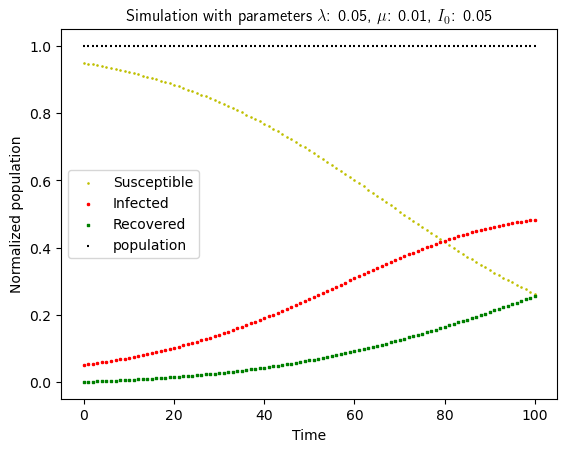

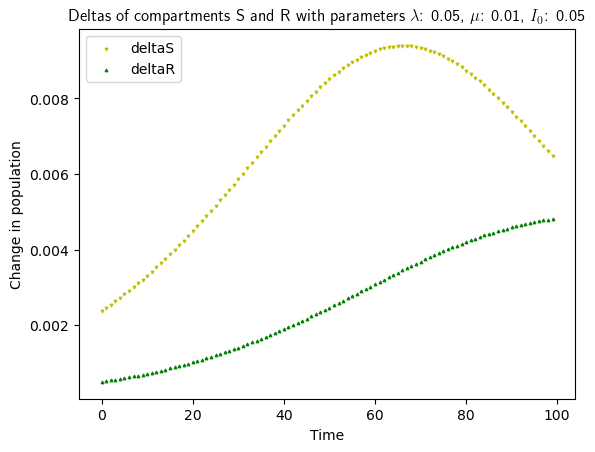

In [176]:
plot_simulation(0.05, 0.01, 0.05, 100)

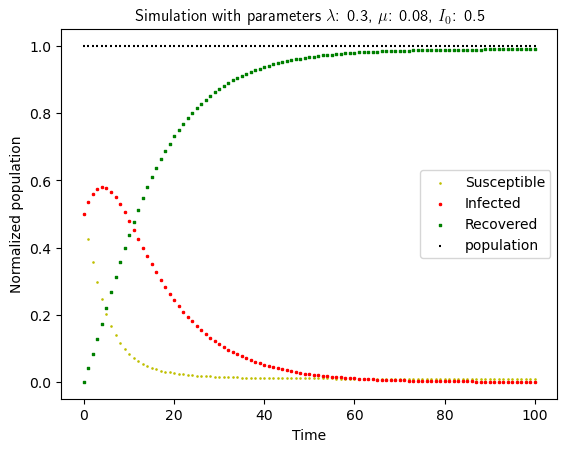

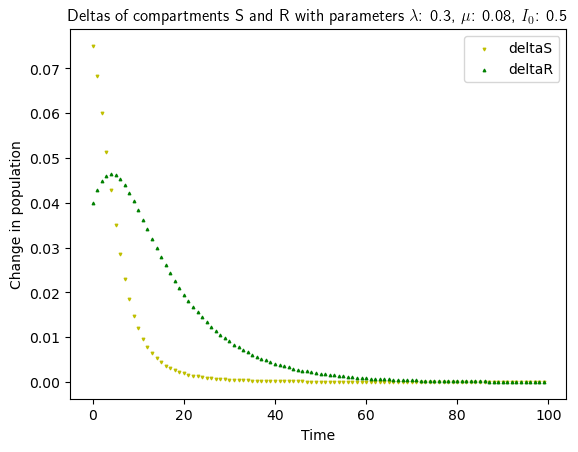

In [170]:
plot_simulation(0.3, 0.08, 0.5, 100)

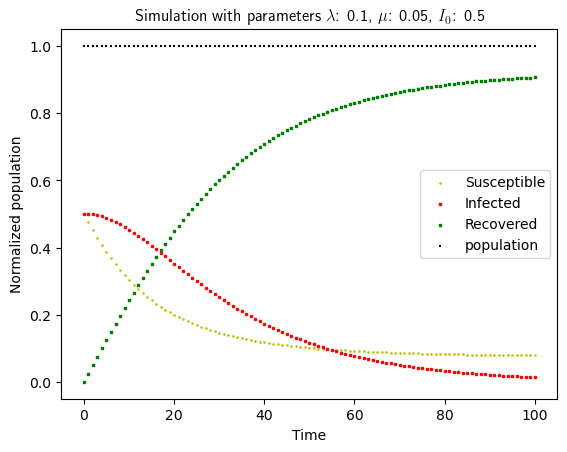

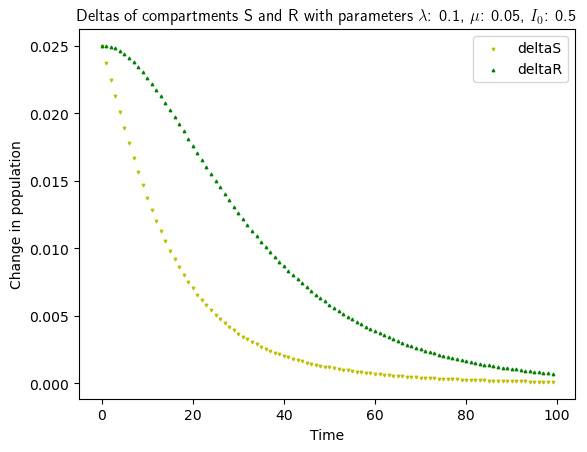

In [171]:
plot_simulation(0.1, 0.05, 0.5, 100)

Range of parameters: $\lambda \in [0.05, 0.3]$, $\mu \in [0.001, 0.08]$, $max I_0 \in [0.05, 0.5]$

Distributions: $p^{sim}(Y) = p^{sim}(\lambda) \cdotp p^{sim}(\mu) \cdotp p^{sim}(I_0) = U(0.05, 0.3) \cdotp U(0.001, 0.08) \cdotp U(0.05, 0.5)$